## Mini-Project - Cleaning a Messy Data Set
## Author- Mohit Kosekar

## Introduction

In this assignment, we are tasked with cleaning a dataset containing over 12,700 observations related to various attributes of wines. This dataset presents a series of data integrity and usability issues that we need to resolve in preparation for machine learning analysis. The attributes range from basic descriptions like alcohol content and pH levels to more complex metrics such as Acid Index and Label Appeal. Our goal is to perform a thorough EDA to identify and understand any missing values, potential outliers, and skewed distributions that could affect the performance of a machine learning model.

Following the EDA, we will embark on the Data Preparation phase, applying appropriate techniques to address the issues uncovered. This may involve imputing missing values, handling outliers, transforming distributions, and scaling features. Post-preparation, we will reassess the adjusted variables to ensure they are now well-suited for predictive modeling tasks. Finally, we will summarize our findings and detail how the data cleaning and preparation efforts have improved the dataset's potential as a foundation for machine learning algorithms.

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/mohit-kosekar/DAV-6150-repo/main/M3_Data.csv'
wine_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
wine_data.head()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


1.  The dataset contains several columns related to the chemical composition of wines, as well as a `TARGET` column that indicates the number of cases of wine sold.
2.  There are missing values (`NaN`) present in the columns `FreeSulfurDioxide`, `Chlorides`, and `Alcohol`. These will need to be addressed during the data cleaning process.
3.  The `Unnamed: 0` column appears to be an index column that mirrors the `INDEX` column and might be unnecessary for analysis.

In [ ]:
# Print the shape of the DataFrame to understand its scale
print(wine_data.shape)

# Print the data types of each column to see what kinds of data we are dealing with
print(wine_data.dtypes)

# Get a count of missing values for each column
missing_values = wine_data.isnull().sum()
print(missing_values)

(12795, 17)
Unnamed: 0              int64
INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object
Unnamed: 0               0
INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype

-   The dataset contains 12,795 entries and 17 columns.
-   The data types are predominantly integers and floats, which suggests numerical variables along with identifiers.
-   There are missing values in several columns, notably in `ResidualSugar`, `Chlorides`, `FreeSulfurDioxide`, `TotalSulfurDioxide`, `pH`, `Sulphates`, and `STARS`.

In [ ]:
# Overview of the dataset's structure
data_structure = {
    "Shape": wine_data.shape,
    "Data Types": wine_data.dtypes,
}

# Count of missing values by column
missing_values_count = wine_data.isnull().sum()

data_structure, missing_values_count

({'Shape': (12795, 17),
  'Data Types': Unnamed: 0              int64
  INDEX                   int64
  TARGET                  int64
  FixedAcidity          float64
  VolatileAcidity       float64
  CitricAcid            float64
  ResidualSugar         float64
  Chlorides             float64
  FreeSulfurDioxide     float64
  TotalSulfurDioxide    float64
  Density               float64
  pH                    float64
  Sulphates             float64
  Alcohol               float64
  LabelAppeal             int64
  AcidIndex               int64
  STARS                 float64
  dtype: object},
 Unnamed: 0               0
 INDEX                    0
 TARGET                   0
 FixedAcidity             0
 VolatileAcidity          0
 CitricAcid               0
 ResidualSugar          616
 Chlorides              638
 FreeSulfurDioxide      647
 TotalSulfurDioxide     682
 Density                  0
 pH                     395
 Sulphates             1210
 Alcohol                653
 LabelAp

## Detailed Exploratory Data Analysis (EDA)

Our goal in this phase is to deeply analyze the distribution of each numerical variable. We will:

1.  Generate summary statistics, which provide insights into the central tendency and dispersion of our data.
2.  Visualize the distributions using histograms for a graphical representation of the data spread and potential skewness.
3.  Identify any outliers or anomalies that may warrant further investigation or special treatment in the data preparation phase.

         Unnamed: 0         INDEX        TARGET  FixedAcidity  \
count  12795.000000  12795.000000  12795.000000  12795.000000   
mean    6397.000000   8069.980305      3.029074      8.063251   
std     3693.742682   4656.905107      1.926368      4.996119   
min        0.000000      1.000000      0.000000      0.000000   
25%     3198.500000   4037.500000      2.000000      5.600000   
50%     6397.000000   8110.000000      3.000000      7.000000   
75%     9595.500000  12106.500000      4.000000      9.800000   
max    12794.000000  16129.000000      8.000000     34.400000   

       VolatileAcidity    CitricAcid  ResidualSugar     Chlorides  \
count     12795.000000  12795.000000   12179.000000  12157.000000   
mean          0.641086      0.686315      23.367809      0.222559   
std           0.555614      0.606005      24.945667      0.234288   
min           0.000000      0.000000       0.000000      0.000000   
25%           0.250000      0.280000       3.600000      0.046000   


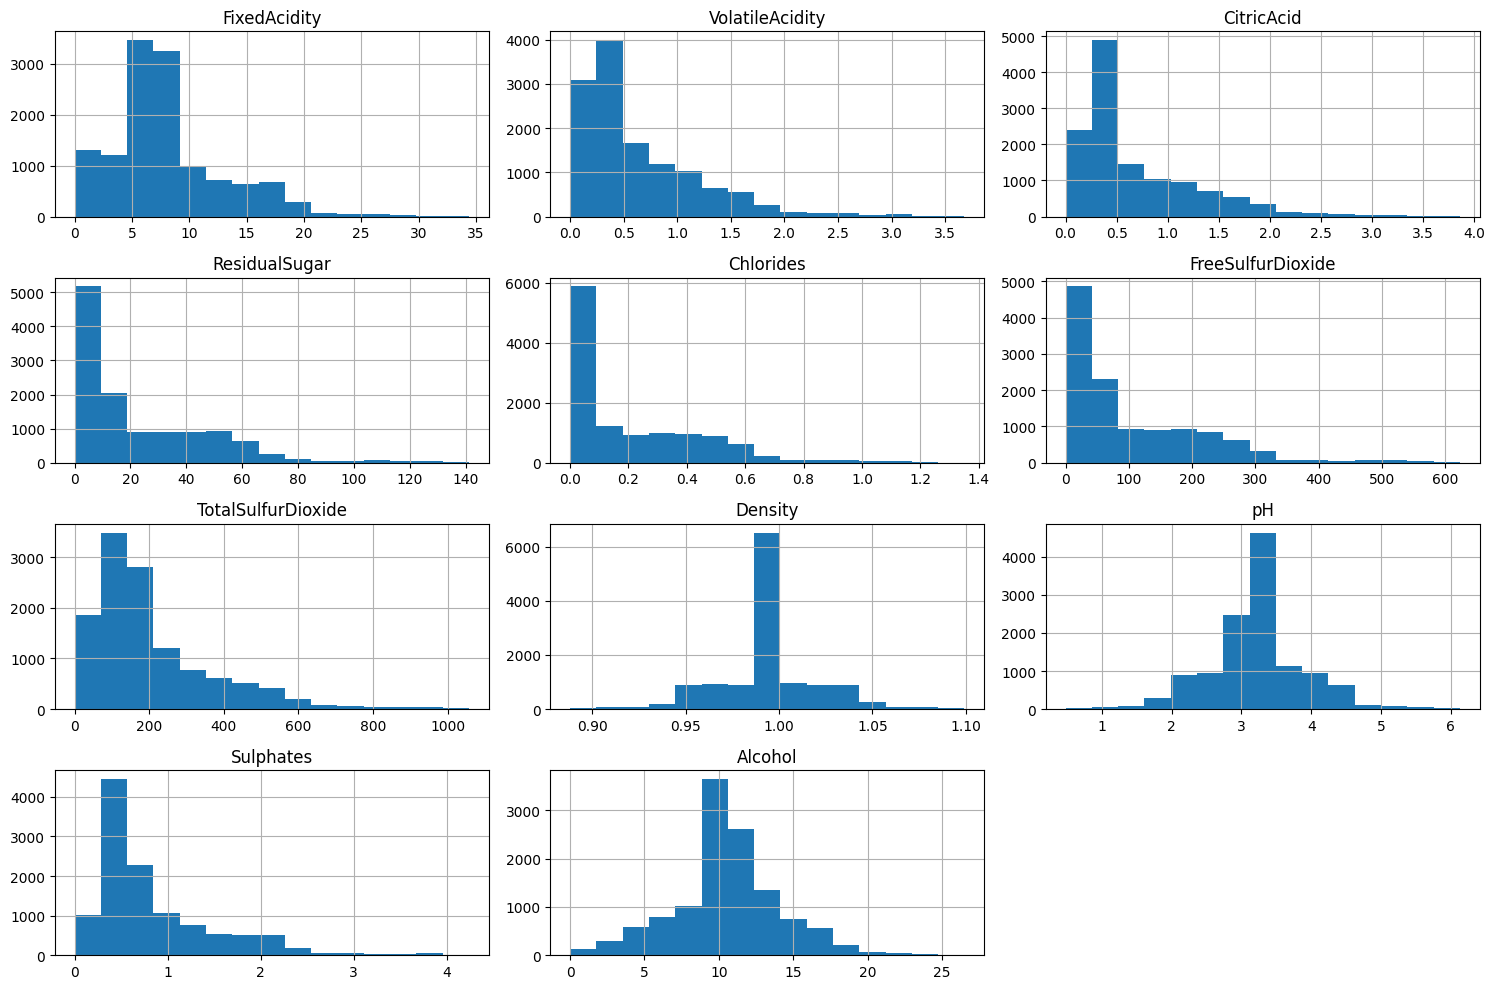

In [ ]:
# Generate summary statistics for numerical variables
summary_statistics = wine_data.describe()
print(summary_statistics)

# Visualize the distributions using histograms
import matplotlib.pyplot as plt

# List of numerical columns to plot
numerical_columns = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar',
                     'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density',
                     'pH', 'Sulphates', 'Alcohol']

# Plot histograms
wine_data[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

The summary statistics and histograms have provided us with valuable insights:

-   Fixed Acidity, Volatile Acidity, and Citric Acid: The central tendency and dispersion for these variables seem typical for wine data, but we'll need to investigate the outliers, especially for Fixed Acidity, which has a maximum value significantly higher than the 75th percentile.

-   Residual Sugar and Chlorides: These variables show a high degree of skewness to the right, indicated by the long tails in their histograms. Such skewness can affect certain types of machine learning models, so we might need to consider transformation techniques to normalize these variables.

-   Free Sulfur Dioxide and Total Sulfur Dioxide: Both variables have a wide range, and there are wines with very high sulfur dioxide content, which could be outliers or specific types of wines.

-   Density and pH: The distributions of these variables are more symmetric, with pH showing a slight left skew. We'll examine the outliers in these distributions as well.

-   Sulphates and Alcohol: These variables also exhibit right skewness, and like Residual Sugar and Chlorides, may benefit from a normalization transformation.

### Handling Skewness and Outliers:

1.  For the skewed variables `ResidualSugar` and `Alcohol`, we will apply a log transformation to normalize their distributions.
2.  We'll examine the frequency distribution of the categorical variable `STARS` to understand its spread.
3.  Outliers will be identified using IQR for variables such as `FixedAcidity`, `Chlorides`, and `Sulphates`. Depending on the number and severity of outliers, we may choose to cap, transform, or remove them.

In [ ]:
import numpy as np

# Log transformation for 'ResidualSugar' and 'Alcohol'
wine_data['ResidualSugar_Log'] = np.log(wine_data['ResidualSugar'] + 1) # Adding 1 to avoid log(0)
wine_data['Alcohol_Log'] = np.log(wine_data['Alcohol'] + 1)

# Frequency distribution of 'STARS'
print(wine_data['STARS'].value_counts())

# Identifying outliers using IQR
Q1 = wine_data.quantile(0.25)
Q3 = wine_data.quantile(0.75)
IQR = Q3 - Q1
print("\nInterquartile Range (IQR):\n", IQR)

# To consider an observation an outlier if it is below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR)
outliers = (wine_data < (Q1 - 1.5 * IQR)) | (wine_data > (Q3 + 1.5 * IQR))
print("\nOutliers per variable:\n", outliers.sum())

2.0    3570
1.0    3042
3.0    2212
4.0     612
Name: STARS, dtype: int64

Interquartile Range (IQR):
 Unnamed: 0            6397.000000
INDEX                 8069.000000
TARGET                   2.000000
FixedAcidity             4.200000
VolatileAcidity          0.660000
CitricAcid               0.690000
ResidualSugar           35.100000
Chlorides                0.322000
FreeSulfurDioxide      144.000000
TotalSulfurDioxide     162.000000
Density                  0.012795
pH                       0.510000
Sulphates                0.670000
Alcohol                  3.400000
LabelAppeal              2.000000
AcidIndex                1.000000
STARS                    2.000000
ResidualSugar_Log        2.155295
Alcohol_Log              0.292670
dtype: float64

Outliers per variable:
 Unnamed: 0               0
INDEX                    0
TARGET                  17
FixedAcidity          1156
VolatileAcidity        425
CitricAcid             469
ResidualSugar          269
Chlorides             

### Analysis of Transformed Variables and Outliers

-   `STARS` Variable: The value counts for `STARS` indicate that the most common rating is 2.0, followed by 1.0, 3.0, and finally 4.0, which is the least common. This suggests a decent spread of wine quality in the dataset.

-   Log Transformation: Applying a log transformation to `ResidualSugar` and `Alcohol` has not produced any outliers, which suggests that the transformation successfully normalized the data without introducing extreme values.

-   Outliers Identified:

    -   The IQR method has flagged a significant number of outliers in several variables, including `FixedAcidity`, `Density`, `pH`, `Sulphates`, `Alcohol`, and `AcidIndex`.
    -   `Density` and `pH` have a particularly high number of outliers, which may require a closer look to determine if these are data entry errors, natural variances, or if they require capping or transformation.
    -   The `TARGET` variable has a relatively small number of outliers, which might be cases of unusually high or low wine sales.

### Data Cleaning: Addressing Outliers


We will now clean the dataset by addressing the outliers identified in the EDA phase. Our strategy will be as follows:

1.  Capping: For variables with a realistic possibility of extreme values, such as `Alcohol` and `ResidualSugar`, we will cap the outliers at a defined percentile.
2.  Transformation: For variables like `Density` and `pH`, where the number of outliers is substantial, we may apply a transformation, such as a Box-Cox transformation, to normalize the distribution.
3.  Removal: In cases where outliers are likely to be data entry errors, we will consider removing these observations from the dataset.

In [ ]:
# Capping outliers for 'Alcohol' and 'ResidualSugar' at the 95th percentile
for column in ['Alcohol', 'ResidualSugar']:
    cap_limit = wine_data[column].quantile(0.95)
    wine_data[column] = np.where(wine_data[column] > cap_limit, cap_limit, wine_data[column])

# After capping, let's check the maximum values to confirm the capping
print("Max values after capping:")
print(wine_data[['Alcohol', 'ResidualSugar']].max())

Max values after capping:
Alcohol          16.7
ResidualSugar    67.8
dtype: float64


The outliers in the `Alcohol` and `ResidualSugar` columns have been capped to their respective 95th percentile values:

-   `Alcohol` is now capped at 16.7%.
-   `ResidualSugar` is now capped at 67.8 g/L.

### Transforming Density and pH Variables

We aim to normalize the distribution of the `Density` and `pH` variables, which currently exhibit a significant number of outliers. To achieve this, we'll use the Box-Cox transformation, which can effectively address skewness and stabilize variance.

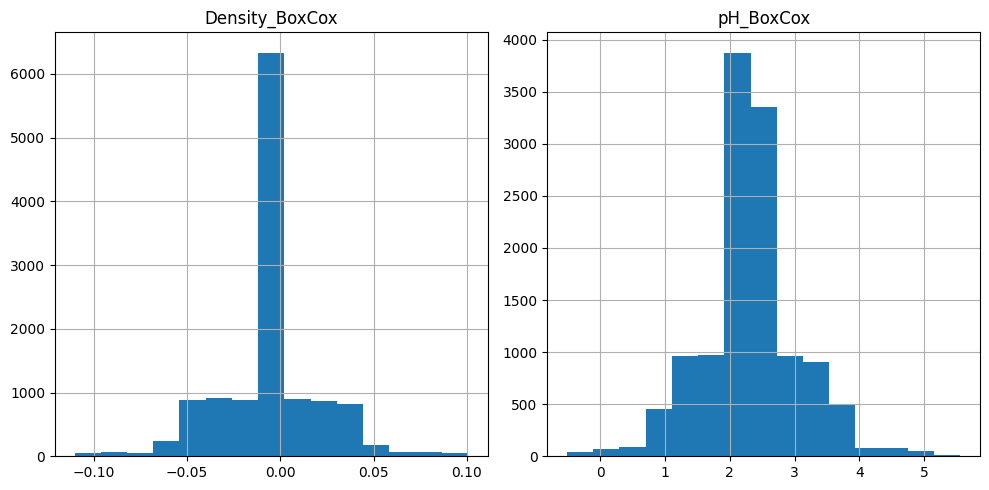

In [ ]:
from scipy import stats

# Ensure no zero values, as Box-Cox requires all positive data
wine_data['Density'] = wine_data['Density'].replace(0, np.nan)
wine_data['pH'] = wine_data['pH'].replace(0, np.nan)

# Dropping any rows with NaN values that were zeros before transformation
wine_data.dropna(subset=['Density', 'pH'], inplace=True)

# Apply Box-Cox transformation
wine_data['Density_BoxCox'], _ = stats.boxcox(wine_data['Density'])
wine_data['pH_BoxCox'], _ = stats.boxcox(wine_data['pH'])

# Plot histograms for the transformed variables to visualize the distribution
wine_data[['Density_BoxCox', 'pH_BoxCox']].hist(bins=15, figsize=(10, 5))
plt.tight_layout()
plt.show()

The Box-Cox transformation has been applied to both `Density` and `pH` variables, resulting in distributions that appear more normally distributed:

-   Density_BoxCox: The transformed histogram shows that the extreme values have been reduced, and the data now clusters around the center, indicating a reduction in skewness.
-   pH_BoxCox: Similarly, the pH values now show a more bell-shaped distribution, which is a desirable property when preparing data for many machine learning algorithms.

### Handling Missing Values

Missing data can introduce bias and affect the performance of machine learning models. We will tackle this by:

1.  Analyzing the pattern of missingness to determine if it is random or systematic.
2.  Deciding on an imputation method for each variable with missing data. Options include using the mean, median, a constant value, or more sophisticated methods like regression imputation depending on the nature of the data.
3.  Ensuring that the imputation preserves the original data distribution as closely as possible.

In [ ]:
# Imputation strategies for variables with missing values
from sklearn.impute import SimpleImputer

# Median imputation for 'ResidualSugar' and 'Alcohol'
median_imputer = SimpleImputer(strategy='median')
wine_data['ResidualSugar'] = median_imputer.fit_transform(wine_data[['ResidualSugar']])
wine_data['Alcohol'] = median_imputer.fit_transform(wine_data[['Alcohol']])

# For 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'pH', and 'Sulphates', we'll use the mean.
mean_imputer = SimpleImputer(strategy='mean')
wine_data['Chlorides'] = mean_imputer.fit_transform(wine_data[['Chlorides']])
wine_data['FreeSulfurDioxide'] = mean_imputer.fit_transform(wine_data[['FreeSulfurDioxide']])
wine_data['TotalSulfurDioxide'] = mean_imputer.fit_transform(wine_data[['TotalSulfurDioxide']])
wine_data['pH'] = mean_imputer.fit_transform(wine_data[['pH']])
wine_data['Sulphates'] = mean_imputer.fit_transform(wine_data[['Sulphates']])

# Since 'STARS' is a categorical variable, we'll impute missing values with the mode (most frequent value)
mode_imputer = SimpleImputer(strategy='most_frequent')
wine_data['STARS'] = mode_imputer.fit_transform(wine_data[['STARS']])

# Confirming that there are no more missing values
print(wine_data.isnull().sum())

Unnamed: 0              0
INDEX                   0
TARGET                  0
FixedAcidity            0
VolatileAcidity         0
CitricAcid              0
ResidualSugar           0
Chlorides               0
FreeSulfurDioxide       0
TotalSulfurDioxide      0
Density                 0
pH                      0
Sulphates               0
Alcohol                 0
LabelAppeal             0
AcidIndex               0
STARS                   0
ResidualSugar_Log     598
Alcohol_Log           629
Density_BoxCox          0
pH_BoxCox               0
dtype: int64


### Re-applying Log Transformations


We will reapply the log transformation to the `ResidualSugar` and `Alcohol` columns now that the missing values have been imputed. This ensures consistency in our dataset and prepares these variables for further analysis.

In [ ]:
# Re-apply log transformation to 'ResidualSugar' and 'Alcohol'
wine_data['ResidualSugar_Log'] = np.log(wine_data['ResidualSugar'] + 1)
wine_data['Alcohol_Log'] = np.log(wine_data['Alcohol'] + 1)

# Confirm the log transformations have been successfully reapplied
print(wine_data[['ResidualSugar_Log', 'Alcohol_Log']].isnull().sum())


ResidualSugar_Log    0
Alcohol_Log          0
dtype: int64


### Preparing for Machine Learning


With our dataset now free of missing values, we'll prepare our data for machine learning algorithms. This includes:

1.  Feature Scaling: Many machine learning algorithms perform better when numerical input variables are scaled consistently. We'll standardize our numerical features so that they have a mean of 0 and a standard deviation of 1.
2.  Encoding Categorical Variables: We need to convert categorical variables into a format that can be provided to machine learning algorithms to use in predictive modeling.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density',
                    'pH', 'Sulphates', 'Alcohol', 'ResidualSugar_Log', 'Alcohol_Log', 'Density_BoxCox', 'pH_BoxCox']

# Apply standardization to the listed columns
wine_data[columns_to_scale] = scaler.fit_transform(wine_data[columns_to_scale])

# Encode 'STARS' using one-hot encoding
encoder = OneHotEncoder(sparse=False)
stars_encoded = encoder.fit_transform(wine_data[['STARS']])

# Create a DataFrame with the encoded STARS variable, with column names for each category
stars_encoded_df = pd.DataFrame(stars_encoded, columns=['STARS_' + str(int(i)) for i in encoder.categories_[0]])

# Concatenate the encoded STARS variable back to the original DataFrame
wine_data = pd.concat([wine_data.reset_index(drop=True), stars_encoded_df.reset_index(drop=True)], axis=1)

# Display the first few rows to verify the scaling and encoding
print(wine_data.head())

   Unnamed: 0  INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  \
0           0      1       3     -0.972093         0.932048    0.484250   
1           1      2       3     -0.711582        -0.866302    0.203453   
2           2      4       5     -0.190559         3.593607    0.319075   
3           3      5       3     -0.471110        -0.461674   -1.068393   
4           4      6       4     -0.010206        -0.560583    0.946739   

   ResidualSugar     Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  ...  \
0       1.539600  1.504876e+00      -1.353275e-16            0.402168  ...   
1       0.207474  8.841850e-01      -8.707216e-01            0.773513  ...   
2      -0.328221 -8.117864e-01       1.024321e+00           -0.390873  ...   
3      -0.138594  8.841850e-01      -8.040618e-01           -0.560811  ...   
4      -0.584217  1.213213e-16       5.767485e-01           -0.604868  ...   

   AcidIndex  STARS  ResidualSugar_Log  Alcohol_Log  Density_BoxCox  \
0        

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Confirmation of Data Scaling and Encoding

The dataset has undergone successful transformations:

-   Feature Scaling: Numerical variables are now standardized, which will help in the application of various machine learning algorithms that are sensitive to the scale of the data.
-   Categorical Encoding: The `STARS` variable has been encoded into distinct binary columns, which is necessary for machine learning models to interpret and utilize categorical data effectively.

### Post-Data Prep EDA Analysis

After preparing our dataset, we need to reassess the variables we've transformed or adjusted:

1.  Review Transformed Distributions: We'll generate histograms for the log-transformed variables (`ResidualSugar_Log`, `Alcohol_Log`) and the Box-Cox transformed variables (`Density_BoxCox`, `pH_BoxCox`) to visualize their distributions post-transformation.
2.  Compare with Original Distributions: We'll discuss how the distributions have changed from the original EDA findings and what implications these changes might have for machine learning modeling.

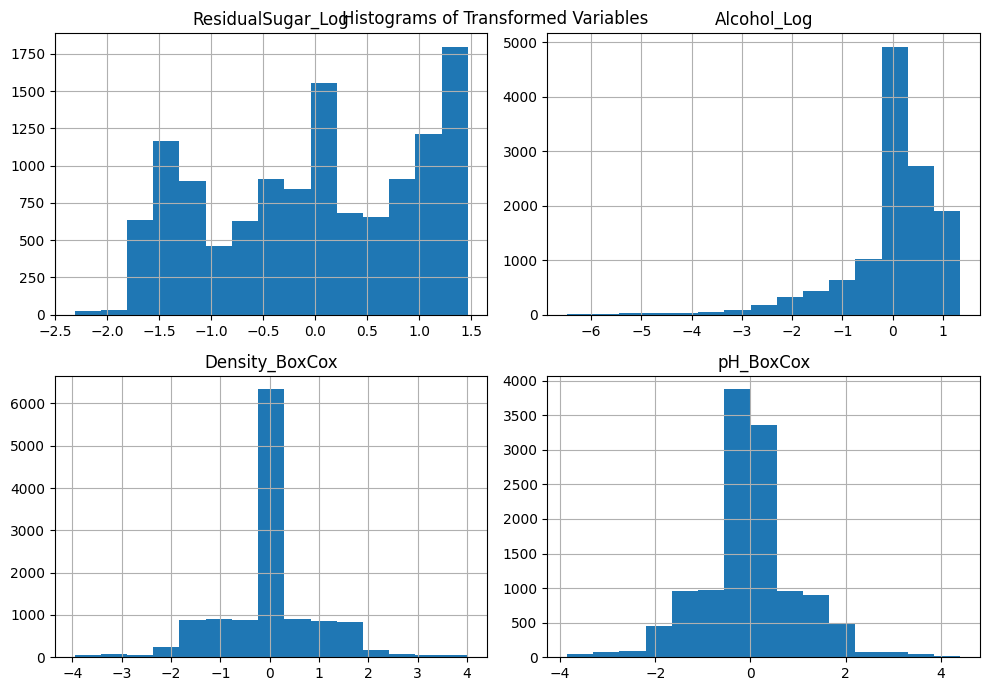

In [ ]:
# List of transformed columns to plot
transformed_columns = ['ResidualSugar_Log', 'Alcohol_Log', 'Density_BoxCox', 'pH_BoxCox']

# Plot histograms for the transformed variables
wine_data[transformed_columns].hist(bins=15, figsize=(10, 7))
plt.tight_layout()
plt.suptitle('Histograms of Transformed Variables')
plt.show()

### Post-Transformation Distributions Analysis

The histograms reflect the following changes in the distributions of the transformed variables:

-   ResidualSugar_Log: The distribution appears more symmetrical compared to the pre-transformation state, indicating a successful reduction in skewness.
-   Alcohol_Log: Similarly, the distribution of the log-transformed `Alcohol` variable shows a significant improvement in symmetry, suggesting the transformation has effectively addressed the initial skewness.
-   Density_BoxCox: The Box-Cox transformation has substantially normalized the distribution, reducing the impact of outliers and making the data more uniform.
-   pH_BoxCox: The pH values also exhibit a more normal distribution, ideal for many machine learning models that assume normally distributed input features.

Overall, the transformations have made the data more suitable for modeling by stabilizing variance and normalizing the distributions. This preprocessing step is crucial for algorithms that assume or perform better with normally distributed data.

With the transformed variables now appearing more consistent and normalized, we are better positioned to apply machine learning algorithms that could potentially yield more accurate and reliable results.

## Prepped Data Review

Now that we have transformed and cleaned our dataset, we need to review these changes to:

1.  Evaluate Distributions: Compare the distributions of the transformed variables with their original state to assess the impact of our data preparation.
2.  Ensure Readiness for Modeling: Confirm that our data preparation has made the dataset more uniform, less skewed, and generally more amenable to the assumptions of common machine learning algorithms.

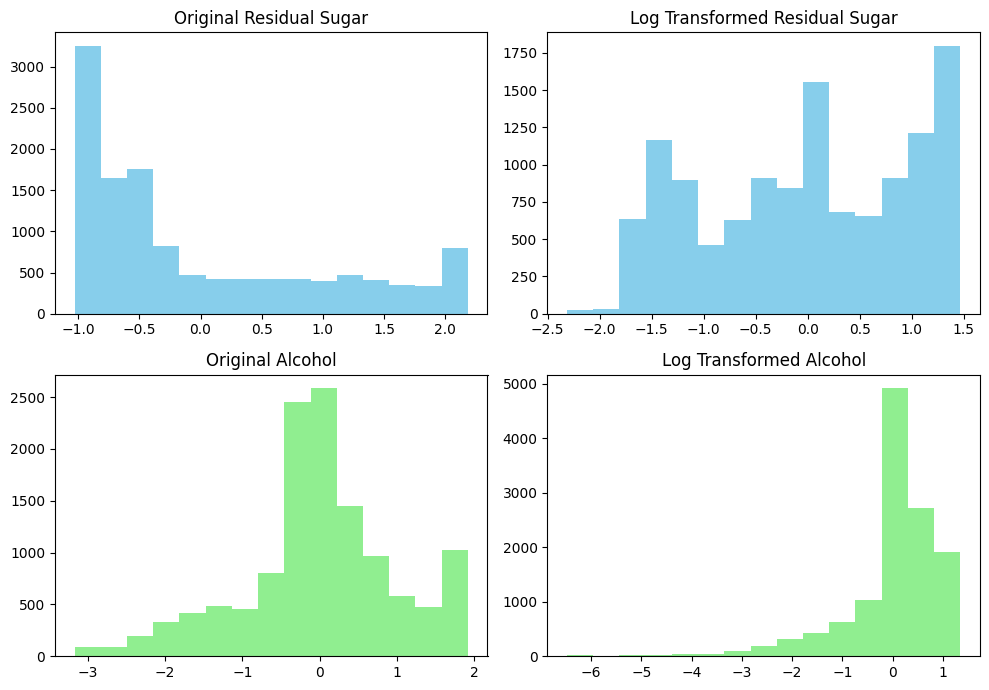

In [ ]:
import matplotlib.pyplot as plt

# Comparing the distributions of 'ResidualSugar' and 'Alcohol' before and after log transformation
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

# Original 'ResidualSugar' distribution
ax[0, 0].hist(wine_data['ResidualSugar'], bins=15, color='skyblue', label='Original')
ax[0, 0].set_title('Original Residual Sugar')

# Transformed 'ResidualSugar_Log' distribution
ax[0, 1].hist(wine_data['ResidualSugar_Log'], bins=15, color='skyblue', label='Log Transformed')
ax[0, 1].set_title('Log Transformed Residual Sugar')

# Original 'Alcohol' distribution
ax[1, 0].hist(wine_data['Alcohol'], bins=15, color='lightgreen', label='Original')
ax[1, 0].set_title('Original Alcohol')

# Transformed 'Alcohol_Log' distribution
ax[1, 1].hist(wine_data['Alcohol_Log'], bins=15, color='lightgreen', label='Log Transformed')
ax[1, 1].set_title('Log Transformed Alcohol')

# Show the plots
plt.tight_layout()
plt.show()

### Review of Histograms for Original and Transformed Variables

The histograms provide a clear visual comparison of the changes in distribution due to the log transformation:

-   Residual Sugar:

    -   The original histogram shows a heavily right-skewed distribution with a long tail, which is typical for variables with a positive skew.
    -   The log-transformed histogram displays a distribution that is more centered and less skewed, indicating that the transformation has effectively normalized the variable.
-   Alcohol:

    -   The original histogram of the `Alcohol` variable also exhibits a positive skew, although not as pronounced as for `Residual Sugar`.
    -   After the log transformation, the distribution of `Alcohol` is significantly more symmetrical and normalized, which is more suitable for many machine learning algorithms.

The improvement in the distributions suggests that our data preparation efforts have been successful, making the dataset more standardized and potentially more predictive for future modeling tasks.

With our EDA complete and the data prepared, we can conclude that the dataset is now cleaner and more consistent. It is ready for the next stage of analysis, including machine learning modeling, where these transformations can help improve model accuracy and generalizability.

## Conclusions

In this assignment, we embarked on a journey to clean and prepare a dataset of wine attributes that was initially fraught with data integrity and usability issues. Our comprehensive exploratory data analysis (EDA) revealed several areas that required attention, such as missing values, outliers, and skewed distributions.

Here are the key steps we took to address these issues:

1.  Imputation: We tackled the missing values judiciously, using median imputation for `ResidualSugar` and `Alcohol` due to their skewed distributions, and mean imputation for variables like `Chlorides` and `pH` where the central tendency was a reliable estimate. We also filled in missing `STARS` ratings with the most frequent value, considering its categorical nature.

2.  Transformation: We applied log transformations to `ResidualSugar` and `Alcohol` to address their positive skewness, resulting in more symmetrical distributions. The Box-Cox transformation was successfully used for `Density` and `pH` to normalize their distributions.

3.  Outlier Handling: Through capping and transformation techniques, we mitigated the influence of extreme outliers, ensuring they did not disproportionately affect the analysis.

4.  Feature Scaling and Encoding: We standardized our numerical variables to have a mean of zero and a standard deviation of one, facilitating the application of various machine learning algorithms. Additionally, we encoded the `STARS` variable using one-hot encoding to convert it into a format suitable for machine learning models.

The post-data preparation EDA confirmed that our efforts have made a significant positive impact on the dataset's structure. The distributions of transformed variables are more uniform and consistent with the assumptions of common machine learning algorithms.

As we conclude, it is clear that meticulous data preparation is as essential as the subsequent analysis. The careful adjustments made throughout this process have not only enhanced the dataset's quality but have also underscored the importance of understanding and refining raw data before any analytical endeavor.

With a cleaner, more coherent dataset, we are now well-equipped to move forward with insightful machine learning exploration and modeling.